# Logistic Regression Steps

1. Data Preprocessing And Analysis
2. Building a Sample Model with Cleaned Data(using GLM)
3. Interpret the model for correctness using pvalues
4. Look for multicolinearity (Optional use when pvalues > 0.025)
5. Find the best Predictors(Using RFE)
6. Now with remaining features build Logistic Regression
7. Apply metrics for accepting the model
8. Log Likelihood(Maximum Likelihood Estimation)
9. Confusion Matrix
10. Classification Matrix
11. Cohen Kappa Score
12. ROC Curve, AUC, FPR, TPR, Threshold
    (IF AUC is less, then your model is not correct)
13. Other Metrics - chi2, deviance, null deviance
    ( if deviance > null deviance acept that our predictors are good)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv('datasets/logistic-regression/framingham_selected_features.csv')
df.shape

(4240, 9)

In [3]:
df.head()

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0,0,1,39,0.0,0,0,0,0
1,1,0,0,46,0.0,0,0,0,0
2,0,0,1,48,0.0,0,0,0,0
3,0,1,0,61,0.0,0,1,0,1
4,0,1,0,46,0.0,0,0,0,0


In [4]:
df.describe()

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.295519,0.162500,0.429245,49.580189,0.029245,0.005896,0.310613,0.025708,0.151887
std,0.456329,0.368952,0.495027,8.572942,0.168513,0.076569,0.462799,0.158280,0.358953
min,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
corr = df.corr()
corr

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
edu_2.0,1.000000,-0.285294,-0.051009,-0.175657,0.004159,-0.002619,-0.033733,-0.030086,-0.062381
edu_3.0,-0.285294,1.000000,-0.091383,-0.043836,-0.011952,-0.008872,-0.048372,-0.014997,-0.029658
male,-0.051009,-0.091383,1.000000,-0.029014,-0.051544,-0.004550,0.005853,0.015693,0.088374
age,-0.175657,-0.043836,-0.029014,1.000000,0.121011,0.057679,0.306799,0.101314,0.225408
BPMeds,0.004159,-0.011952,-0.051544,0.121011,1.000000,0.114614,0.258580,0.051407,0.086448
prevalentStroke,-0.002619,-0.008872,-0.004550,0.057679,0.114614,1.000000,0.074791,0.006955,0.061823
prevalentHyp,-0.033733,-0.048372,0.005853,0.306799,0.258580,0.074791,1.000000,0.077752,0.177458
diabetes,-0.030086,-0.014997,0.015693,0.101314,0.051407,0.006955,0.077752,1.000000,0.097344
TenYearCHD,-0.062381,-0.029658,0.088374,0.225408,0.086448,0.061823,0.177458,0.097344,1.000000


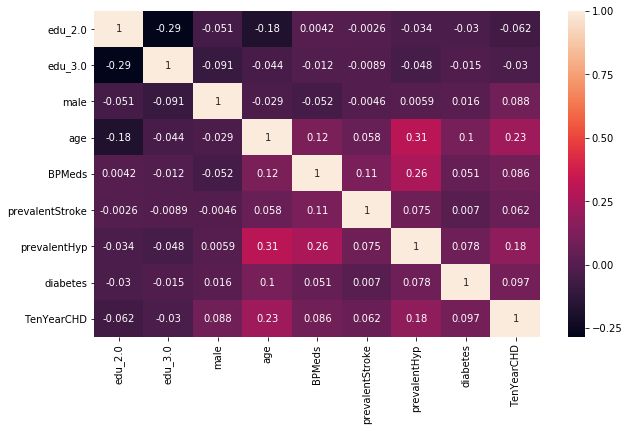

In [6]:
plt.figure(figsize= (10, 6))
sns.heatmap(corr, annot = True)
plt.show()

In [7]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df.TenYearCHD
X

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0,0,1,39,0.0,0,0,0
1,1,0,0,46,0.0,0,0,0
2,0,0,1,48,0.0,0,0,0
3,0,1,0,61,0.0,0,1,0
4,0,1,0,46,0.0,0,0,0
...,...,...,...,...,...,...,...,...
4235,1,0,0,48,0.0,0,0,0
4236,0,0,0,44,0.0,0,0,0
4237,1,0,0,52,0.0,0,0,0
4238,0,1,1,40,0.0,0,1,0


In [8]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2968, 8), (1272, 8), (2968,), (1272,))

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_train_pred = model.predict(x_train)
np.unique(y_train_pred)

array([0, 1], dtype=int64)

## Metrics Evaluation on Train

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
cm = confusion_matrix(y_train, y_train_pred)

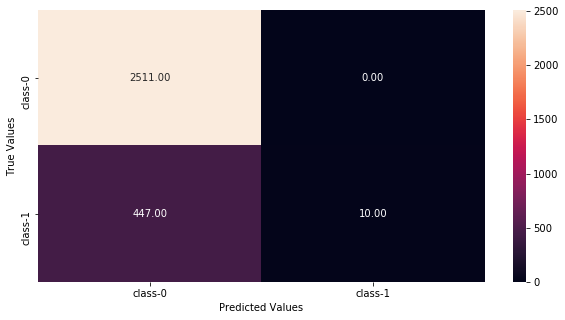

In [14]:
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot = True, fmt = '0.2f', 
            xticklabels=['class-0','class-1'],
            yticklabels = ['class-0','class-1'],
            cbar = True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [16]:
precision_score(y_train, y_train_pred)

1.0

In [17]:
recall_score(y_train, y_train_pred)

0.02188183807439825

In [18]:
accuracy_score(y_train, y_train_pred)

0.8493935309973046

In [19]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       1.00      0.02      0.04       457

    accuracy                           0.85      2968
   macro avg       0.92      0.51      0.48      2968
weighted avg       0.87      0.85      0.78      2968



## Metrics Evaluation on Test

In [20]:
y_test_predicted = model.predict(x_test)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
cm_test = confusion_matrix(y_test, y_test_predicted)
cm_test

array([[1083,    2],
       [ 181,    6]], dtype=int64)

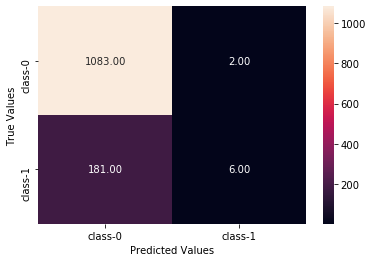

In [22]:
sns.heatmap(cm_test,
            annot = True,
            fmt = '0.2f',
            xticklabels=['class-0','class-1'],
            yticklabels = ['class-0','class-1'],
            cbar = True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [1]:
precision_score(y_test, y_test_predicted)

NameError: name 'precision_score' is not defined

In [ ]:
recall_score(y_test, y_test_predicted)

In [25]:
accuracy_score(y_test, y_test_predicted)

0.8561320754716981

In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
y_test_pred_prob = model.predict_proba(x_test)
y_test_pred_prob_1 = y_test_pred_prob[:,1]
y_test_pred_prob_1

array([0.15733657, 0.08475946, 0.10235901, ..., 0.097245  , 0.13640173,
       0.06064487])

In [28]:
fpr, tpr, proba = roc_curve(y_test, y_test_pred_prob_1)
fpr, tpr, proba

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.21658986e-04,
        9.21658986e-04, 1.84331797e-03, 1.84331797e-03, 5.52995392e-03,
        5.52995392e-03, 6.45161290e-03, 8.29493088e-03, 9.21658986e-03,
        9.21658986e-03, 1.10599078e-02, 1.56682028e-02, 1.75115207e-02,
        1.84331797e-02, 2.02764977e-02, 2.02764977e-02, 2.11981567e-02,
        2.11981567e-02, 2.21198157e-02, 2.21198157e-02, 2.30414747e-02,
        2.58064516e-02, 2.58064516e-02, 2.76497696e-02, 2.85714286e-02,
        2.85714286e-02, 3.04147465e-02, 3.50230415e-02, 3.50230415e-02,
        3.96313364e-02, 3.96313364e-02, 4.23963134e-02, 4.51612903e-02,
        4.88479263e-02, 4.97695853e-02, 4.97695853e-02, 5.25345622e-02,
        5.34562212e-02, 5.52995392e-02, 5.71428571e-02, 5.71428571e-02,
        5.89861751e-02, 5.99078341e-02, 6.26728111e-02, 6.45161290e-02,
        6.72811060e-02, 7.09677419e-02, 7.18894009e-02, 7.55760369e-02,
        7.64976959e-02, 7.74193548e-02, 7.83410138e-02, 7.926267

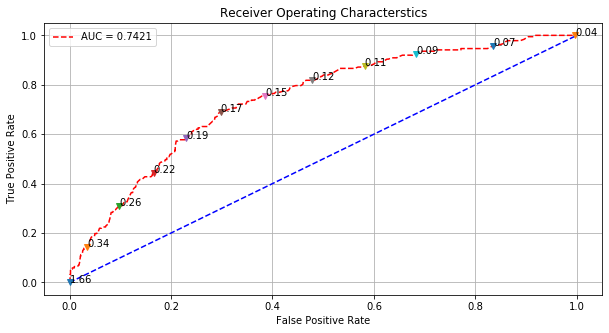

In [29]:
plt.figure(figsize = (10, 5))
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1], [0,1], 'b--')
for i in range(len(proba)):
    if i % 30 == 0:
        plt.plot(fpr[i],tpr[i],'v')
        plt.text(fpr[i], tpr[i], '%0.2f'%proba[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')

area = auc(fpr,tpr)
plt.legend(['AUC = %0.4F'%area])
plt.grid()


## ROC and AUC on Train

In [30]:
y_train_pred_prob = model.predict_proba(x_train)
y_train_pred_prob_1 = y_train_pred_prob[:, 1]
y_train_pred_prob_1

array([0.097245  , 0.19727573, 0.14455011, ..., 0.1346229 , 0.09756616,
       0.05555422])

In [31]:
fpr_train, tpr_train, proba_train = roc_curve(y_train, y_train_pred_prob_1)

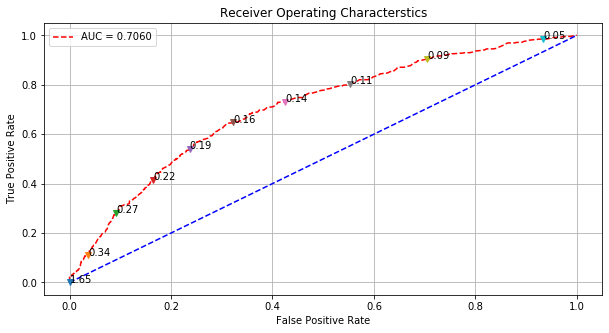

In [32]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train, tpr_train, 'r--')
plt.plot([0,1], [0,1], 'b--')
for i in range(len(proba_train)):
    if i % 50 == 0:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i], tpr_train[i], '%0.2f'%proba_train[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')

area = auc(fpr_train,tpr_train)
plt.legend(['AUC = %0.4F'%area])
plt.grid()